The dataset is downloaded from https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present-Map/c4ep-ee5m

References:
Index Crimes
http://home.chicagopolice.org/wp-content/uploads/2018/04/Definitions-IndexCrimeCategories.pdf




In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [3]:
chicago_crimes_main = pd.read_csv("Crimes_-_2001_to_present_-_Map.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
chicago_crimes_main.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,8.0,11,NaN,NaN,2001,NaN,NaN,NaN
1,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,21.0,02,NaN,NaN,2017,NaN,NaN,NaN
2,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,18.0,05,NaN,NaN,2017,NaN,NaN,NaN
3,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,20.0,06,NaN,NaN,2017,NaN,NaN,NaN
4,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,42.0,02,NaN,NaN,2017,NaN,NaN,NaN


In [5]:
chicago_crimes_main['Primary Type'].unique()

array(['DECEPTIVE PRACTICE', 'CRIM SEXUAL ASSAULT', 'BURGLARY', 'THEFT',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL DAMAGE', 'OTHER OFFENSE',
       'NARCOTICS', 'SEX OFFENSE', 'BATTERY', 'MOTOR VEHICLE THEFT',
       'ROBBERY', 'ASSAULT', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'PROSTITUTION', 'INTIMIDATION', 'ARSON',
       'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING', 'STALKING',
       'KIDNAPPING', 'OTHER NARCOTIC VIOLATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE', 'RITUALISM',
       'HUMAN TRAFFICKING', 'PUBLIC INDECENCY', 'NON - CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'DOMESTIC VIOLENCE'],
      dtype=object)

In [97]:
#get Year column from Date
chicago_crimes_main.loc[:,'Year'] = pd.to_datetime(chicago_crimes_main['Date']).dt.year

In [124]:
chicago_crimes_main.tail(25)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
6999607,HY189951,12/01/2013 12:01:00 AM,121XX S INDIANA AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,532,9.0,11,1179759.0,1824639.0,2013,41.674081,-87.617697,"(41.674080811, -87.617697384)"
6999608,HY189744,03/18/2015 03:00:00 PM,034XX S LEAVITT ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,912,11.0,11,1162247.0,1881931.0,2015,41.831680,-87.680202,"(41.831679801, -87.68020176)"
6999609,HY189655,03/18/2015 08:00:00 AM,035XX N PONTIAC AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,1631,36.0,05,1119808.0,1922453.0,2015,41.943658,-87.835055,"(41.943658469, -87.83505498)"
6999610,HY189948,03/18/2015 08:20:00 PM,004XX N SPRINGFIELD AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,1122,27.0,18,1150309.0,1902722.0,2015,41.888974,-87.723462,"(41.88897351, -87.723461985)"
6999611,HY189636,03/18/2015 12:00:00 PM,038XX S PARNELL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,915,11.0,08B,1173265.0,1879265.0,2015,41.824127,-87.639855,"(41.824127071, -87.639854701)"
6999612,HY189855,03/18/2015 07:25:00 PM,001XX W 107TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,512,34.0,08B,1177075.0,1833998.0,2015,41.699824,-87.627240,"(41.699824057, -87.627240336)"
6999613,HY189892,03/18/2015 07:26:00 PM,068XX S CRANDON AVE,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,True,False,331,5.0,14,1192499.0,1860155.0,2015,41.771240,-87.569915,"(41.771240376, -87.569915317)"
6999614,HY189857,03/18/2015 07:42:00 PM,017XX W 18TH ST,0560,ASSAULT,SIMPLE,SMALL RETAIL STORE,False,False,1234,25.0,08A,1165285.0,1891456.0,2015,41.857753,-87.668785,"(41.85775341, -87.668784595)"
6999615,HY189757,03/18/2015 02:00:00 PM,052XX W ADAMS ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1522,29.0,02,1141570.0,1898832.0,2015,41.878465,-87.755652,"(41.878464822, -87.755651544)"
6999616,HY189728,03/18/2015 05:49:00 PM,042XX W WILCOX ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1115,28.0,15,1148119.0,1898998.0,2015,41.878797,-87.731600,"(41.878796866, -87.731600482)"


In [113]:
chicago_crimes_main['Description'].unique()

array(['FINANCIAL IDENTITY THEFT OVER $ 300', 'NON-AGGRAVATED',
       'UNLAWFUL ENTRY', 'OVER $500', 'PREDATORY',
       'CRIM SEX ABUSE BY FAM MEMBER', 'AGG SEX ASSLT OF CHILD FAM MBR',
       'TO PROPERTY', 'HARASSMENT BY ELECTRONIC MEANS', '$500 AND UNDER',
       'AGG CRIM SEX ABUSE FAM MEMBER', 'CREDIT CARD FRAUD',
       'MANU/DELIVER:CRACK', 'SEX ASSLT OF CHILD BY FAM MBR',
       'FINANCIAL IDENTITY THEFT $300 AND UNDER', 'FROM BUILDING',
       'AGG CRIMINAL SEXUAL ABUSE', 'ATTEMPT NON-AGGRAVATED',
       'CHILD ABUSE', 'FORCIBLE ENTRY', 'CRIMINAL SEXUAL ABUSE',
       'CHILD PORNOGRAPHY', 'SIMPLE', 'EMBEZZLEMENT', 'AGGRAVATED: OTHER',
       'HARASSMENT BY TELEPHONE', 'TELEPHONE THREAT', 'POCKET-PICKING',
       'MANU/DEL:CANNABIS 10GM OR LESS', 'POSS: CRACK',
       'ATTEMPT - FINANCIAL IDENTITY THEFT', 'ILLEGAL USE CASH CARD',
       'OTHER VEHICLE OFFENSE', 'AUTOMOBILE', 'ARMED: HANDGUN',
       'SEX OFFENDER: FAIL TO REGISTER', 'TO VEHICLE', 'AGGRAVATED',
       'SEX OFF

In [103]:
#based on the Index crimes (reference 1), I will make two categories of crime types
#take only the aggravated crimes as violent crimes

violent_crime_type_list =  ['HOMICIDE','ASSAULT','ROBBERY', 'CRIM SEXUAL ASSAULT','BATTERY'] #'CRIM SEXUAL ASSAULT',
property_crime_type_list =  ['ARSON','BURGLARY','THEFT''MOTOR VEHICLE THEFT'] #'MOTOR VEHICLE THEFT'
aggravated_only_list = ['AGGRAVATED','AGGRAVATED:']

In [84]:
#for my first sets of graphs to figure out the crime type over the years, I only need Primary Type and Date 
#get the interested columns only
crimetype_years_data = chicago_crimes_main[['Date','Primary Type']]
crimetype_years_data.head()

,Date,Primary Type
0,01/01/2001 11:00:00 AM,DECEPTIVE PRACTICE
1,10/08/2017 03:00:00 AM,CRIM SEXUAL ASSAULT
2,03/28/2017 02:00:00 PM,BURGLARY
3,09/09/2017 08:17:00 PM,THEFT
4,08/26/2017 10:00:00 AM,CRIM SEXUAL ASSAULT


In [ ]:
#(467201, 3)

#ASSAULT ->(438322, 3)
#CRIM SEXUAL ASSAULT->(28879, 3)


In [104]:
violent_crime_type_mask = crimetype_years_data['Primary Type'].isin(violent_crime_type_list)

In [105]:
violent_crime_type_mask.head()

0    False
1     True
2    False
3    False
4     True
Name: Primary Type, dtype: bool

In [120]:
violent_crime_type_mask = chicago_crimes_main['Primary Type'].isin(violent_crime_type_list)
year_mask = chicago_crimes_main['Year'] == 2015
aggravated_mask =chicago_crimes_main['Description'].str.contains('AGGRAVATED')
non_aggravated_mask =chicago_crimes_main['Description'].str.contains('NON-AGGRAVATED')

violent_crime_type_data = chicago_crimes_main[violent_crime_type_mask & aggravated_mask & ~non_aggravated_mask]
violent_crime_type_data.tail()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
6999547,HY189788,03/18/2015 06:30:00 PM,003XX N HOMAN AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1123,28.0,04B,1153657.0,1902018.0,2015,41.886976,-87.711185,"(41.886975709, -87.711185496)"
6999554,HY189574,03/18/2015 04:13:00 PM,013XX W 111TH PL,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,True,False,2234,34.0,04B,1169486.0,1830829.0,2015,41.691295,-87.655119,"(41.691295186, -87.655119442)"
6999578,HY189626,03/18/2015 04:47:00 PM,045XX N CLARENDON AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1914,46.0,04B,1170092.0,1930503.0,2015,41.964797,-87.649998,"(41.9647971, -87.649998238)"
6999601,HY189827,02/19/2015 08:30:00 PM,033XX W EASTWOOD AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,APARTMENT,True,True,1713,33.0,04A,1153359.0,1930653.0,2015,41.965558,-87.711517,"(41.965558419, -87.711517268)"
6999621,HY189647,03/18/2015 04:55:00 PM,057XX S MICHIGAN AVE,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,232,20.0,04B,1178134.0,1867092.0,2015,41.790614,-87.622362,"(41.790614044, -87.622361533)"


In [125]:
specific_crime_type_mask = chicago_crimes_main['Primary Type'].str.contains('HOMICIDE')
test_type_data = chicago_crimes_main[specific_crime_type_mask & year_mask]
test_type_data.tail()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
2065317,HY433114,09/25/2015 03:50:00 PM,058XX S PULASKI RD,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,813,13.0,01A,1150707.0,1865354.0,2015,41.786423,-87.722976,"(41.786423093, -87.722975512)"
2080812,HY496484,11/10/2015 03:15:00 PM,033XX W 61ST ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,823,15.0,01A,1155083.0,1863975.0,2015,41.782553,-87.706968,"(41.782552548, -87.706967516)"
2151393,H572315,08/12/2015 06:19:00 PM,017XX W WILSON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,1912,47.0,01A,1163649.0,1930591.0,2015,41.965177,-87.673685,"(41.965177134, -87.673684908)"
2167850,HX293341,03/03/2015 07:00:00 AM,046XX S ELLIS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,222,4.0,01A,1183698.0,1874524.0,2015,41.810880,-87.601728,"(41.810879969, -87.601728004)"
2168497,HY153654,05/31/2015 12:01:00 AM,057XX S HERMITAGE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,715,15.0,01A,1165661.0,1866552.0,2015,41.789406,-87.668112,"(41.789406165, -87.668112217)"


In [121]:
violent_crime_type_data.head(50)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
1112,JA391024,07/01/2015 12:00:00 PM,043XX N KOSTNER AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,False,1722,38.0,02,NaN,NaN,2015,NaN,NaN,NaN
10651,HY550255,12/26/2015 04:28:00 AM,047XX W ERIE ST,0553,ASSAULT,AGGRAVATED PO: OTHER DANG WEAP,SIDEWALK,False,False,1111,28.0,04A,NaN,NaN,2015,NaN,NaN,NaN
17283,HZ301142,02/05/2015 07:00:00 PM,051XX S MOBILE AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,False,811,23.0,02,NaN,NaN,2015,NaN,NaN,NaN
17893,HZ343068,04/19/2015 02:00:00 AM,065XX S FAIRFIELD AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,True,831,15.0,02,NaN,NaN,2015,NaN,NaN,NaN
18197,HZ366763,11/29/2015 10:00:00 PM,003XX N LAMON AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,True,1532,28.0,02,NaN,NaN,2015,NaN,NaN,NaN
18693,HZ415215,09/02/2015 05:30:00 PM,059XX W DIVERSEY AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),False,False,2514,30.0,04B,NaN,NaN,2015,NaN,NaN,NaN
19574,HZ473342,03/17/2015 12:00:00 PM,004XX W ENGLEWOOD AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,RESIDENCE,False,False,711,20.0,04A,NaN,NaN,2015,NaN,NaN,NaN
21756,HZ569085,11/01/2015 03:00:00 PM,022XX S CHRISTIANA AVE,0495,BATTERY,AGGRAVATED OF A SENIOR CITIZEN,RESIDENCE,False,True,1024,22.0,04B,NaN,NaN,2015,NaN,NaN,NaN
26490,HY162675,02/24/2015 06:20:00 PM,011XX E BOWEN AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,True,214,4.0,04A,NaN,NaN,2015,NaN,NaN,NaN
26919,HZ212607,10/30/2015 09:10:00 PM,021XX E 70TH ST,0263,CRIM SEXUAL ASSAULT,AGGRAVATED: KNIFE/CUT INSTR,STREET,False,False,331,5.0,02,NaN,NaN,2015,NaN,NaN,NaN


In [122]:
violent_crime_type_data['Primary Type'].unique()

array(['CRIM SEXUAL ASSAULT', 'ASSAULT', 'BATTERY', 'ROBBERY'],
      dtype=object)

In [123]:
violent_crime_type_data['Description'].unique()

array(['AGGRAVATED: OTHER', 'AGGRAVATED PO: OTHER DANG WEAP',
       'AGGRAVATED: OTHER DANG WEAPON', 'AGGRAVATED: HANDGUN',
       'AGGRAVATED OF A SENIOR CITIZEN', 'AGGRAVATED: KNIFE/CUT INSTR',
       'AGGRAVATED OF A CHILD',
       'AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST',
       'AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON',
       'AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY',
       'AGGRAVATED:KNIFE/CUTTING INSTR', 'AGGRAVATED: OTHER FIREARM',
       'AGGRAVATED', 'AGGRAVATED VEHICULAR HIJACKING',
       'AGGRAVATED PO:KNIFE/CUT INSTR', 'AGGRAVATED PO: HANDGUN',
       'AGGRAVATED OF A UNBORN CHILD', 'AGGRAVATED PO: OTHER FIREARM',
       'AGGRAVATED DOMESTIC BATTERY: HANDGUN', 'ATTEMPT: AGGRAVATED',
       'AGGRAVATED PO: KNIFE/CUT INSTR',
       'AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM'], dtype=object)

In [91]:
violent_crime_type_data.shape

(145741, 3)

In [96]:
test = violent_crime_type_data[crimetype_years_data['Primary Type'] == "BATTERY"]
#test['Primary Type'].unique()
test.shape #(1,803, 3) =CRIM SEXUAL ASSAULT, (31,384, 3) =ASSAULT, (93,446, 3) =BATTERY, 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(93446, 3)

In [29]:
property_crime_type_mask = crimetype_years_data['Primary Type'].isin(property_crime_type_list)
property_crime_type_data = crimetype_years_data[property_crime_type_mask]
property_crime_type_data.head()

,Date,Primary Type,Year
2,03/28/2017 02:00:00 PM,BURGLARY,2017
3,09/09/2017 08:17:00 PM,THEFT,2017
8,07/17/2017 10:10:00 AM,THEFT,2017
13,07/29/2017 03:40:00 PM,THEFT,2017
20,07/29/2017 10:00:00 AM,THEFT,2017


In [30]:
property_crime_type_data['Primary Type'].unique()

array(['BURGLARY', 'THEFT', 'MOTOR VEHICLE THEFT', 'ARSON'], dtype=object)

In [31]:
del violent_crime_type_data['Date']
del property_crime_type_data['Date']

In [32]:
violent_crime_type_data.loc[:,'Value']=1
property_crime_type_data.loc[:,'Value']=1

In [33]:
property_crime_type_data.head()

,Primary Type,Year,Value
2,BURGLARY,2017,1
3,THEFT,2017,1
8,THEFT,2017,1
13,THEFT,2017,1
20,THEFT,2017,1


In [34]:
property_crime_type_data = property_crime_type_data.reset_index()

In [35]:
property_crime_type_data.head()

,index,Primary Type,Year,Value
0,2,BURGLARY,2017,1
1,3,THEFT,2017,1
2,8,THEFT,2017,1
3,13,THEFT,2017,1
4,20,THEFT,2017,1


In [36]:
del property_crime_type_data['index']

In [37]:
property_crime_type_data.head()

,Primary Type,Year,Value
0,BURGLARY,2017,1
1,THEFT,2017,1
2,THEFT,2017,1
3,THEFT,2017,1
4,THEFT,2017,1


In [80]:
violent_crime_type_data = violent_crime_type_data.reset_index()
del violent_crime_type_data['index']
violent_crime_type_data.head()

,Date,Primary Type
0,10/08/2017 03:00:00 AM,CRIM SEXUAL ASSAULT
1,08/26/2017 10:00:00 AM,CRIM SEXUAL ASSAULT
2,02/10/2013 12:00:00 AM,CRIM SEXUAL ASSAULT
3,07/12/2001 12:01:00 AM,CRIM SEXUAL ASSAULT
4,01/01/2007 12:01:00 AM,CRIM SEXUAL ASSAULT


In [79]:
test_filter = violent_crime_type_data[violent_crime_type_data['Year'] == 2001 ]

KeyError: 'Year'

In [43]:
violent_crime_type_data = violent_crime_type_data.groupby(['Primary Type', 'Year']).sum()
violent_crime_type_data = violent_crime_type_data.reset_index()
violent_crime_type_data.head()

,Primary Type,Year,Value
0,ASSAULT,2001,31384
1,ASSAULT,2002,31521
2,ASSAULT,2003,29477
3,ASSAULT,2004,28850
4,ASSAULT,2005,27066


In [44]:
test_filter = violent_crime_type_data[violent_crime_type_data['Primary Type'] == "ASSAULT"]
test_filter.head()

,Primary Type,Year,Value
0,ASSAULT,2001,31384
1,ASSAULT,2002,31521
2,ASSAULT,2003,29477
3,ASSAULT,2004,28850
4,ASSAULT,2005,27066


In [45]:
test_filter.shape

(19, 3)

In [46]:
test_filter['Value'].sum()

438322

In [47]:
#for bar plot with violent and property crime over the years
all_violent_crime_data = violent_crime_type_data[['Year','Value']]
all_property_crime_data = property_crime_type_data[['Year','Value']]

In [48]:
all_violent_crime_data.head()

,Year,Value
0,2001,31384
1,2002,31521
2,2003,29477
3,2004,28850
4,2005,27066


In [49]:
all_violent_crime_data.shape

(95, 2)

In [50]:
all_violent_crime_data = all_violent_crime_data.groupby(['Year']).sum()

In [51]:
all_violent_crime_data.head()

,Value
Year,
2001,145741
2002,146682
2003,137391
2004,133992
2005,129083


In [52]:
all_violent_crime_data.shape

(19, 1)

In [53]:
all_property_crime_data  = all_property_crime_data.groupby(['Year']).sum()
all_property_crime_data.head()

,Value
Year,
2001,153835
2002,150103
2003,147734
2004,143610
2005,134375


In [54]:
all_property_crime_data.shape

(19, 1)

In [55]:
all_property_crime_data.rename(columns={'Value':'Property Crime'}, inplace=True)
all_property_crime_data.head()

,Property Crime
Year,
2001,153835
2002,150103
2003,147734
2004,143610
2005,134375


In [56]:
all_violent_crime_data.rename(columns={'Value':'Violent Crime'}, inplace=True)
all_violent_crime_data.head()

,Violent Crime
Year,
2001,145741
2002,146682
2003,137391
2004,133992
2005,129083


In [57]:
both_crime_df = all_violent_crime_data.merge(all_property_crime_data, on="Year", how = 'inner')
both_crime_df.head()

,Violent Crime,Property Crime
Year,,
2001,145741,153835
2002,146682,150103
2003,137391,147734
2004,133992,143610
2005,129083,134375


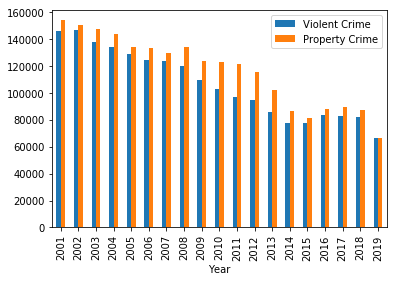

In [58]:
both_crime_df.plot.bar()

In [59]:
def draw_bar_plot_over_years(maindf, crimeType, title, ylabel, yrange ):
    plt.clf()
    fig, axis = plt.subplots(figsize=(20, 10))
    axis.set_title(title, fontsize=10)
    axis.set_xlabel('Year',fontsize=10 )
    axis.set_ylabel(ylabel,fontsize=10)
    axis.yaxis.grid(True)
    plt.bar(maindf['Year'],maindf[crimeType])
    axis.set_xticks(np.arange(2001,2020,1))
    axis.set_yticks(yrange)
    plt.show()

In [60]:
both_crime_df = both_crime_df.reset_index()
both_crime_df.head()

,Year,Violent Crime,Property Crime
0,2001,145741,153835
1,2002,146682,150103
2,2003,137391,147734
3,2004,133992,143610
4,2005,129083,134375


In [61]:
violent_filter = both_crime_df[['Year','Violent Crime']]
violent_filter['Violent Crime'].max()


146682

<Figure size 432x288 with 0 Axes>

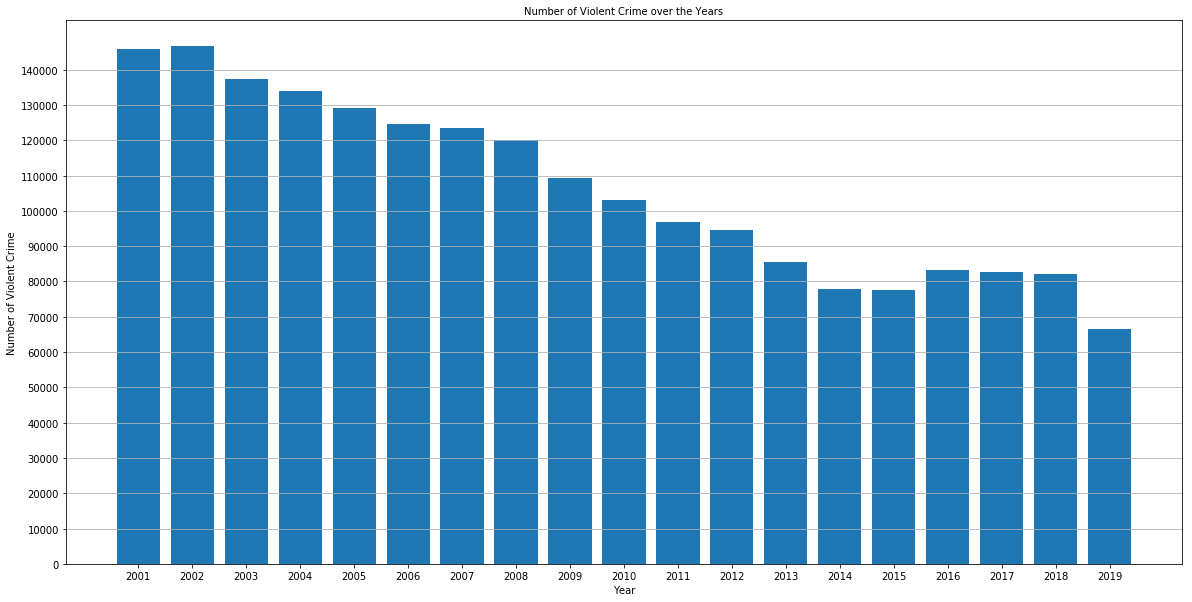

In [62]:
draw_bar_plot_over_years(violent_filter,'Violent Crime','Number of Violent Crime over the Years', 'Number of Violent Crime',np.arange(0,150000,10000))

In [63]:
property_filter = both_crime_df[['Year','Property Crime']]
property_filter['Property Crime'].max()

153835

<Figure size 432x288 with 0 Axes>

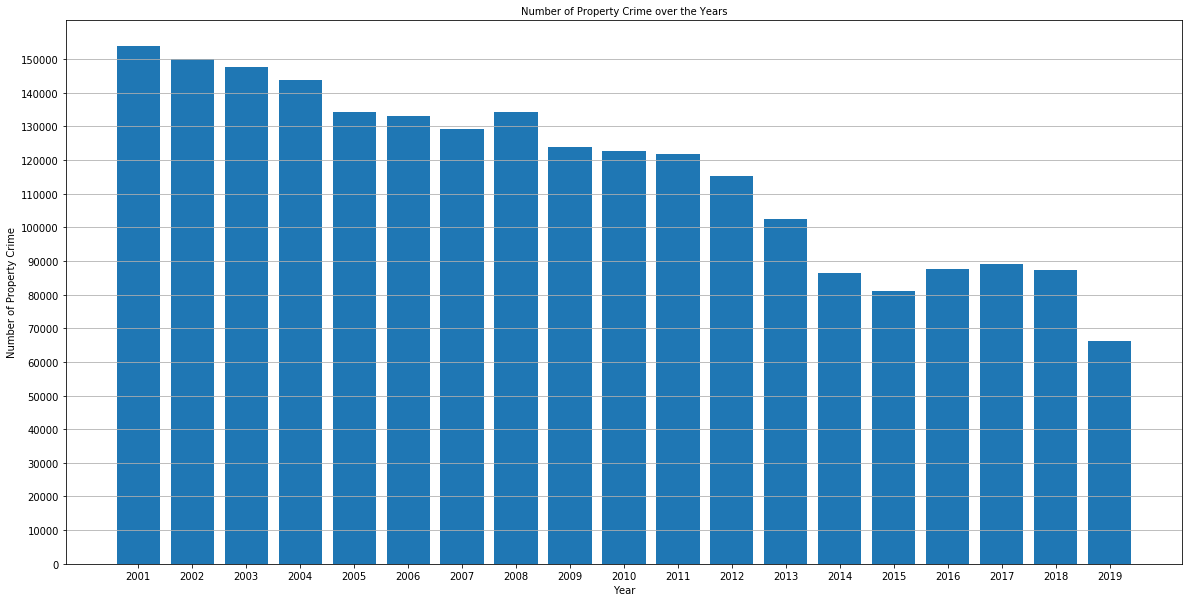

In [64]:
draw_bar_plot_over_years(property_filter,'Property Crime','Number of Property Crime over the Years', 'Number of Property Crime',np.arange(0,160000,10000))

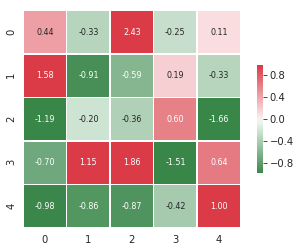

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(5)
df = pd.DataFrame(np.random.randn(5,5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(133, 10, as_cmap=True)

with sns.axes_style("white"):
    ax = sns.heatmap(df, annot=True, fmt='.2f', cmap=cmap, vmin=-0.99, vmax=.99, center=0.00,
                square=True, linewidths=.5, annot_kws={"size": 8}, cbar_kws={"shrink": .5})
plt.show()